# Heap's Law

---

First of all we set MODE and SAMPLE_RATE variables to specify what kind of analyze do we want.

- MODE: 1 or 2
- SAMPLE_RATE: 5000 or 15000

In [1]:
MODE = [1, 2]
SAMPLE_RATE = [5000, 15000]

Now we get heap's data files to generate their plots.

In [2]:
import math

data = []

for mode in MODE:
    for rate in SAMPLE_RATE:
        axis = []

        with open(f'heaps-{mode}-{rate}.txt', 'r') as f:
            data_f = f.readlines()
            y_axis = 0

            for d in data_f:
                tmp = d.replace('\n', '').split(',')
                if tmp[0] != '0' and tmp[1] != '0':
                    x_axis = math.log10(int(tmp[0]))
                    y_axis = math.log10(int(tmp[1]))
                    axis.append((x_axis, y_axis))

        data.append(axis)            

After fetching data, sorting the results is *necessary*.

Then the results are suitable for plot.

In [3]:
x, y = [], []

for _axis in data:
    _axis.sort()
    x.append([i[0] for i in _axis])
    y.append([i[1] for i in _axis])

Now we draw a plot for each pair of mode and sample rate.

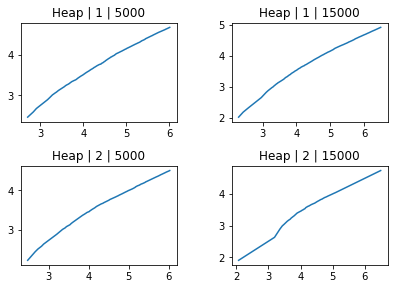

In [4]:
import matplotlib.pyplot as plt

plt.figure()

plt.subplot(221)
plt.plot(x[0], y[0])
plt.title("Heap | 1 | 5000")

plt.subplot(222)
plt.plot(x[1], y[1])
plt.title("Heap | 1 | 15000")

plt.subplot(223)
plt.plot(x[2], y[2])
plt.title("Heap | 2 | 5000")

plt.subplot(224)
plt.plot(x[3], y[3])
plt.title("Heap | 2 | 15000")

plt.subplots_adjust(
    top=0.92, 
    bottom=0.08, 
    left=0.10, 
    right=0.95, 
    hspace=0.45,
    wspace=0.35,
)

plt.show()

Now we want to find the line that is the best least squares fit for each plot.

We can guess that it would be something like `log M = 0.49 log T + 1.64`. After some trial and error, we came to a conclusion. The constant part `1.56` gave us the best fit.

Thus, `M = 10 ^ 1.64 * T ^ 0.49` so `k ~= 36` and `b = 0.49`

In [5]:
Y = []
for i in x:
    Y.append([0.49 * j + 1.56 for j in i])

After finding thatline, we draw the plots again to check their fitness.

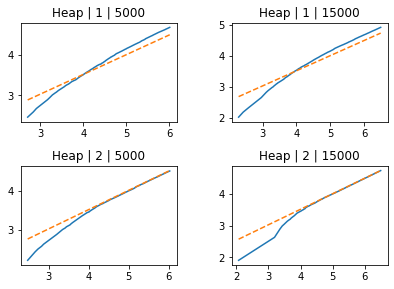

In [6]:
plt.subplot(221)
plt.plot(x[0], y[0])
plt.plot(x[0], Y[0], '--')
plt.title("Heap | 1 | 5000")

plt.subplot(222)
plt.plot(x[1], y[1])
plt.plot(x[1], Y[1], '--')
plt.title("Heap | 1 | 15000")

plt.subplot(223)
plt.plot(x[2], y[2])
plt.plot(x[2], Y[2], '--')
plt.title("Heap | 2 | 5000")

plt.subplot(224)
plt.plot(x[3], y[3])
plt.plot(x[3], Y[3], '--')
plt.title("Heap | 2 | 15000")

plt.subplots_adjust(
    top=0.92, 
    bottom=0.08, 
    left=0.10, 
    right=0.95, 
    hspace=0.45,
    wspace=0.35,
)

plt.show()